MovieWriter imagemagick unavailable; using Pillow instead.


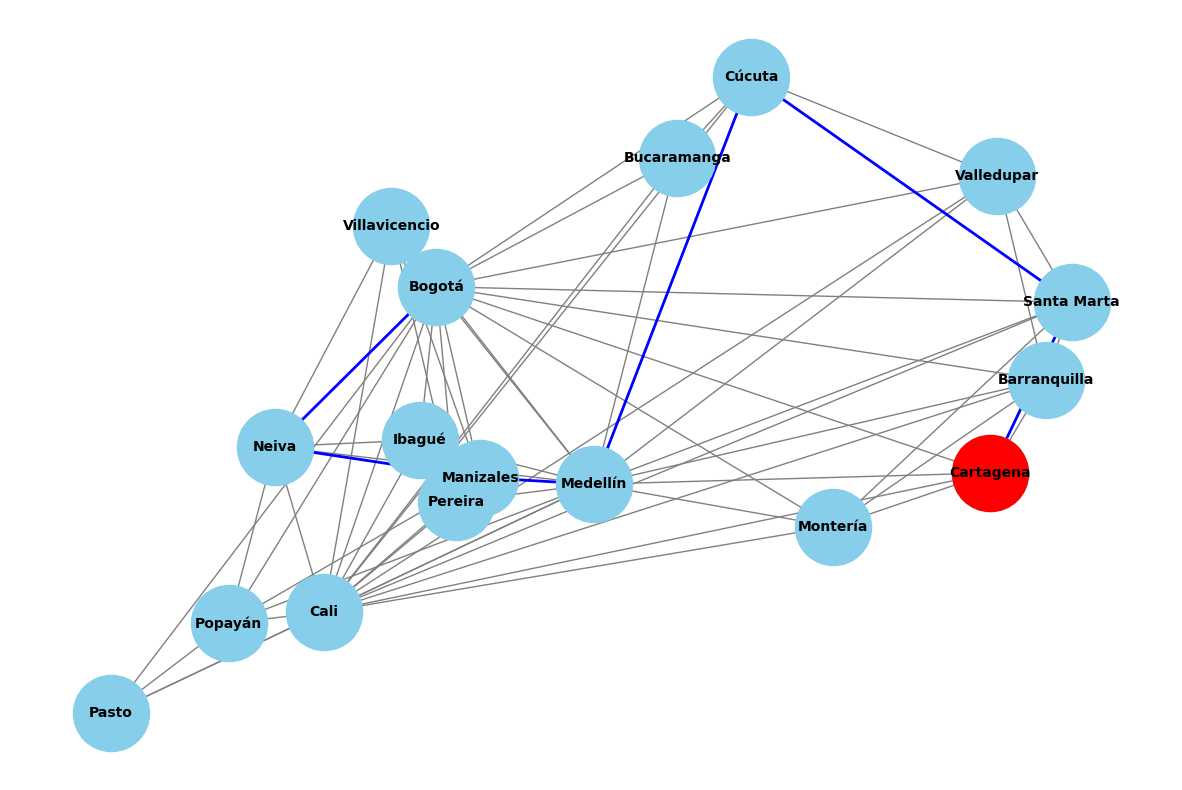

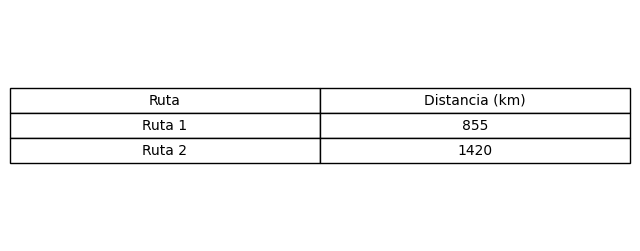

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Crear el grafo
G = nx.Graph()

# Agregar nodos y aristas con pesos de distancia
routes = [
    ("Bogotá", "Medellín", 415),
    ("Bogotá", "Cali", 464),
    ("Bogotá", "Cartagena", 1040),
    ("Medellín", "Cali", 415),
    ("Medellín", "Cartagena", 640),
    ("Cali", "Cartagena", 1010),
    ("Bogotá", "Bucaramanga", 400),
    ("Medellín", "Bucaramanga", 390),
    ("Cali", "Bucaramanga", 780),
    ("Bogotá", "Santa Marta", 940),
    ("Medellín", "Santa Marta", 725),
    ("Cali", "Santa Marta", 1070),
    ("Bogotá", "Pereira", 320),
    ("Medellín", "Pereira", 210),
    ("Cali", "Pereira", 220),
    ("Bogotá", "Barranquilla", 990),
    ("Medellín", "Barranquilla", 710),
    ("Cali", "Barranquilla", 1110),
    ("Bogotá", "Ibagué", 200),
    ("Medellín", "Ibagué", 345),
    ("Cali", "Ibagué", 230),
    ("Bogotá", "Villavicencio", 125),
    ("Medellín", "Villavicencio", 450),
    ("Cali", "Villavicencio", 520),
    ("Bogotá", "Manizales", 290),
    ("Medellín", "Manizales", 180),
    ("Cali", "Manizales", 260),
    ("Bogotá", "Neiva", 320),
    ("Medellín", "Neiva", 535),
    ("Cali", "Neiva", 430),
    ("Bogotá", "Pasto", 750),
    ("Medellín", "Pasto", 840),
    ("Cali", "Pasto", 520),
    ("Bogotá", "Cúcuta", 560),
    ("Medellín", "Cúcuta", 580),
    ("Cali", "Cúcuta", 870),
    ("Bogotá", "Popayán", 600),
    ("Medellín", "Popayán", 515),
    ("Cali", "Popayán", 140),
    ("Bogotá", "Montería", 760),
    ("Medellín", "Montería", 500),
    ("Cali", "Montería", 850),
    ("Bogotá", "Valledupar", 850),
    ("Medellín", "Valledupar", 590),
    ("Cali", "Valledupar", 1050),
    # Rutas adicionales para interconectar más ciudades
    ("Barranquilla", "Cartagena", 130),
    ("Barranquilla", "Santa Marta", 110),
    ("Cartagena", "Santa Marta", 210),
    ("Ibagué", "Pereira", 150),
    ("Ibagué", "Manizales", 190),
    ("Ibagué", "Neiva", 200),
    ("Villavicencio", "Pereira", 400),
    ("Villavicencio", "Manizales", 370),
    ("Villavicencio", "Neiva", 360),
    ("Manizales", "Pereira", 50),
    ("Manizales", "Neiva", 340),
    ("Manizales", "Popayán", 390),
    ("Neiva", "Popayán", 330),
    ("Pasto", "Popayán", 270),
    ("Pasto", "Cali", 520),
    ("Popayán", "Cali", 140),
    ("Cúcuta", "Bucaramanga", 190),
    ("Cúcuta", "Valledupar", 440),
    ("Cúcuta", "Santa Marta", 630),
    ("Montería", "Cartagena", 310),
    ("Montería", "Santa Marta", 430),
    ("Montería", "Barranquilla", 380),
    ("Valledupar", "Santa Marta", 220),
    ("Valledupar", "Barranquilla", 310)
]

# Añadir aristas al grafo
for route in routes:
    G.add_edge(route[0], route[1], weight=route[2])

# Coordenadas aproximadas de las ciudades para la visualización
positions = {
    "Bogotá": (4.60971, -74.08175),
    "Medellín": (6.25184, -75.56359),
    "Cali": (3.43722, -76.5225),
    "Cartagena": (10.39105, -75.47943),
    "Bucaramanga": (7.12539, -73.1198),
    "Santa Marta": (11.24079, -74.19904),
    "Pereira": (4.81428, -75.69456),
    "Barranquilla": (10.96854, -74.78132),
    "Ibagué": (4.43889, -75.23222),
    "Villavicencio": (4.142, -73.62664),
    "Manizales": (5.07028, -75.51389),
    "Neiva": (2.9273, -75.28189),
    "Pasto": (1.21361, -77.28111),
    "Cúcuta": (7.89391, -72.50782),
    "Popayán": (2.44278, -76.60667),
    "Montería": (8.748, -75.88143),
    "Valledupar": (10.46314, -73.25322)
}

# Función para encontrar la ruta más corta en términos de distancia
def dijkstra_path(G, start, end):
    return nx.dijkstra_path(G, source=start, target=end, weight='weight')

# Inicializar la figura
fig, ax = plt.subplots(figsize=(15, 10))

# Dibujar el grafo
nx.draw(G, positions, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray", ax=ax)

# Ruta más corta de Bogotá a Cartagena pasando por Neiva, Medellín y Cúcuta
path_segments = [
    ("Bogotá", "Neiva"),
    ("Neiva", "Medellín"),
    ("Medellín", "Cúcuta"),
    ("Cúcuta", "Cartagena")
]

# Encontrar todas las rutas parciales
full_route = []
for segment in path_segments:
    route_segment = dijkstra_path(G, segment[0], segment[1])
    full_route.extend(route_segment[:-1])
full_route.append(path_segments[-1][1])

# Dibujar la ruta completa
path_edges = list(zip(full_route, full_route[1:]))

# Función de actualización para la animación
def update(num, path_edges, ax):
    ax.clear()
    nx.draw(G, positions, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray", ax=ax)
    edges_to_draw = path_edges[:num+1]
    nx.draw_networkx_edges(G, positions, edgelist=edges_to_draw, edge_color="blue", width=2, ax=ax)
    nx.draw_networkx_nodes(G, positions, nodelist=[full_route[num+1]], node_color="red", node_size=3000)

ani = animation.FuncAnimation(fig, update, frames=len(path_edges), fargs=[path_edges, ax], interval=1000, repeat=False)

# Guardar la animación como un archivo GIF (opcional)
ani.save('dijkstra_animation.gif', writer='imagemagick')

# Mostrar la animación
plt.show()
# Crear la tabla con las distancias recorridas por cada ruta
def create_distance_table():
    # Definir las aristas de cada ruta
    path_edges = [
        [("Bogotá", "Neiva"), ("Neiva", "Medellín")],
        [("Medellín", "Cúcuta"), ("Cúcuta", "Santa Marta"), ("Santa Marta", "Cartagena")]
    ]

    # Calcular las distancias para cada ruta
    distances_data = [(f"Ruta {i+1}", sum(G.edges[edge]['weight'] for edge in path_segment)) for i, path_segment in enumerate(path_edges)]
    distances_df = pd.DataFrame(distances_data, columns=["Ruta", "Distancia (km)"])

    # Crear la tabla
    fig, ax_table = plt.subplots(figsize=(8, 3))
    ax_table.axis('off')
    table = ax_table.table(cellText=distances_df.values, colLabels=distances_df.columns, cellLoc="center", loc="center")

    # Estilizar la tabla
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

# Llamar a la función para crear la tabla
create_distance_table()

# Mostrar el gráfico con la tabla
plt.show()
